# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 **전처리**, **배치 크키**, **shuffling**등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정 (Loading)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 메모리의 리스트, 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - **filter(함수)**: 특정 조건의 데이터만 제공하도록 처리.
        - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.

3. **데이터 제공 설정 관련**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다. (에폭단위)
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

In [86]:
import tensorflow as tf
import numpy as np

##### Tensor
- TensorFlow의 기본 data type. 
- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.

In [88]:
t = tf.constant([1,2,3], dtype="float32")
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [90]:
# tensor=>numpy 변환
a = t.numpy() # Tensor객체.numpy()
a

array([1., 2., 3.], dtype=float32)

In [92]:
# numpy/list => tensor 변환
t2 = tf.constant(a)
t2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [94]:
# numpy/list => tensor 변환
t3 = tf.convert_to_tensor(a)
t3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [96]:
raw_data1 = np.arange(10)
raw_data1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [100]:
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


##### x, y 묶어서 제공
- 두개 이상의 데이터셋을 묶어서 제공할 경우 Tuple로 묶어준다.
    - Dataset이 feeding 할 때는 같은 index의 값들을 tuple로 묶어서 제공 (zip()과 동일)

In [102]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [104]:
print(raw_data1)
print(raw_data2)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [106]:
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2)) 
for X, y in dataset2:
    print(X, y)

tf.Tensor(0, shape=(), dtype=int64) tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64) tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64) tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64) tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64) tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64) tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64) tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64) tf.Tensor(19, shape=(), dtype=int64)


In [108]:
dataset3 = dataset.take(3)
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


##### shuffle

In [110]:
dataset4 = dataset.shuffle(10) 
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.
    - Train dataset을 만들때 True로 설정하여 항상 일정한 batch size로 학습할 수 있도록 한다. drop 되는 데이터는 다른 epoch을 반복할 때 사용된다.

In [112]:
dataset5 = dataset.batch(3, drop_remainder = True)
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)


In [114]:
dataset6 = dataset.shuffle(10).batch(3)
for d in dataset6:
    print(d)

tf.Tensor([2 1 5], shape=(3,), dtype=int64)
tf.Tensor([4 9 3], shape=(3,), dtype=int64)
tf.Tensor([6 0 7], shape=(3,), dtype=int64)
tf.Tensor([8], shape=(1,), dtype=int64)


##### repeat

In [116]:
dataset7 = dataset.repeat(3) 
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
t

In [118]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([3 2 7 4 6], shape=(5,), dtype=int64)
tf.Tensor([0 9 5 8 1], shape=(5,), dtype=int64)
tf.Tensor([4 9 1 8 6], shape=(5,), dtype=int64)
tf.Tensor([0 5 3 7 2], shape=(5,), dtype=int64)
tf.Tensor([9 0 4 2 1], shape=(5,), dtype=int64)
tf.Tensor([7 6 5 8 3], shape=(5,), dtype=int64)


##### map

In [120]:
def mapping_func(x):
    return x**2

dataset9 = dataset.map(mapping_func)
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)
tf.Tensor(81, shape=(), dtype=int64)


In [122]:
def mapping_func2(x, y):
    return x**3, y

dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
dataset10 = dataset2.map(mapping_func2)

In [124]:
for data in dataset10:
    print(data)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=10>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=11>)
(<tf.Tensor: shape=(), dtype=int64, numpy=8>, <tf.Tensor: shape=(), dtype=int64, numpy=12>)
(<tf.Tensor: shape=(), dtype=int64, numpy=27>, <tf.Tensor: shape=(), dtype=int64, numpy=13>)
(<tf.Tensor: shape=(), dtype=int64, numpy=64>, <tf.Tensor: shape=(), dtype=int64, numpy=14>)
(<tf.Tensor: shape=(), dtype=int64, numpy=125>, <tf.Tensor: shape=(), dtype=int64, numpy=15>)
(<tf.Tensor: shape=(), dtype=int64, numpy=216>, <tf.Tensor: shape=(), dtype=int64, numpy=16>)
(<tf.Tensor: shape=(), dtype=int64, numpy=343>, <tf.Tensor: shape=(), dtype=int64, numpy=17>)
(<tf.Tensor: shape=(), dtype=int64, numpy=512>, <tf.Tensor: shape=(), dtype=int64, numpy=18>)
(<tf.Tensor: shape=(), dtype=int64, numpy=729>, <tf.Tensor: shape=(), dtype=int64, numpy=19>)


In [125]:
dataset11 = dataset.map(lambda x: x**2)
for data in dataset11:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(49, shape=(), dtype=int64)
tf.Tensor(64, shape=(), dtype=int64)
tf.Tensor(81, shape=(), dtype=int64)


In [126]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=100>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=121>)
(<tf.Tensor: shape=(), dtype=int64, numpy=8>, <tf.Tensor: shape=(), dtype=int64, numpy=144>)
(<tf.Tensor: shape=(), dtype=int64, numpy=27>, <tf.Tensor: shape=(), dtype=int64, numpy=169>)
(<tf.Tensor: shape=(), dtype=int64, numpy=64>, <tf.Tensor: shape=(), dtype=int64, numpy=196>)
(<tf.Tensor: shape=(), dtype=int64, numpy=125>, <tf.Tensor: shape=(), dtype=int64, numpy=225>)
(<tf.Tensor: shape=(), dtype=int64, numpy=216>, <tf.Tensor: shape=(), dtype=int64, numpy=256>)
(<tf.Tensor: shape=(), dtype=int64, numpy=343>, <tf.Tensor: shape=(), dtype=int64, numpy=289>)
(<tf.Tensor: shape=(), dtype=int64, numpy=512>, <tf.Tensor: shape=(), dtype=int64, numpy=324>)
(<tf.Tensor: shape=(), dtype=int64, numpy=729>, <tf.Tensor: shape=(), dtype=int64, numpy=361>)


##### filter

In [127]:
def filter_func(x):
    return x%2 == 0 

dataset13 = dataset.filter(filter_func)
print(type(dataset13))

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>


In [128]:
for data in dataset13:
    print(data)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [129]:
dataset14 = dataset.filter(lambda x : x > 5)
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


##### 종합

In [130]:
raw_data = np.arange(-10,11)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data)\
                               .filter(lambda x:x>=0)\
                               .map(lambda y:y+10)\
                               .shuffle(raw_data.size)\
                               .batch(3)

In [131]:
for data in dataset_final:
    print(data)

tf.Tensor([14 12 20], shape=(3,), dtype=int64)
tf.Tensor([13 11 15], shape=(3,), dtype=int64)
tf.Tensor([18 19 10], shape=(3,), dtype=int64)
tf.Tensor([17 16], shape=(2,), dtype=int64)


# 문제 유형별 MLP 네트워크
- Multi Layer Perceptron
    - Fully Connected Layer로 구성된 네트워크

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [132]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

In [133]:
np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩

In [134]:
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(404, 13) (102, 13)
(404,) (102,)


In [135]:
train_X[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [136]:
train_y[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

##### 하이퍼파라미터, 변수 정의

In [137]:
# 하이퍼 파라미터 => 한군데 몰아서 선언하는 것이 좋다
LEARNING_RATE = 0.001  # 학습률
N_EPOCHS  = 200        # epoch수: traindataset을 몇번 학습할지 횟수
N_BATCHS = 32          # batch size: 1 step당 몇개의 데이터를 학습할지 (2의 거듭제곱한값)
# 사용할 변수
N_TRAIN = train_X.shape[0]   # train data의 개수
N_TEST = test_X.shape[0]     # test data의 개수

##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### Dataset 생성

In [139]:
# train set을 위한 dataset을 생성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)

# (X_train, y_train)을 묶어서 제공
# shuffle -> epoch 단위로 shuffl을 제공
# batch size설정. Train set에서는 보통 drop_remainder=True로 설정. 각 step마다 동일 개수의 데이터셋을 학습하도록 하기위해
    
# validation dataset -> 학습하는 도중에 검증데이터로 사용할 dataset
    
# 최종 평가시 사용할 데이터셋
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)
# test set의 batch_size : 전체 데이터를 묶어서 검ㅈ으하는 것이 아니라 batch_size 개수별로 검증해서 그 평균을 최종 평가 결과로 반환

##### 모델 구현

#### 모델 구현
1. 모델을 생성 - Sequential 방식
2. 모델에 Layer를 순서대로 추가
    - Input Layer
    - Hidden Layer 들 (layer의 unit수, layer의 개수 => 튜닝대상 (개수가 많을수록 복잡한 모델-overfitting발생할수있다)
    - Output Layer

In [140]:
def create_housing_model():
    
    model = keras.Sequential()
#     model.add(InputLayer((13,)))  # Input Layer 추가 1. -> InputLayer생성=> Feature shape을 지정
    model.add(layers.Dense(units=128, activation='relu', input_shape=(13,))) # Input Layer 추가 2 -> 첫번째 hidden layer추가하면서 input_shape속성에 feature에 shape 지종
#     hidden layer 추가
#     DenseLayer: units - unit의 개수, activation= 활성함수
#     DenseLayer의 unit수는 점점 개수를 줄여나간다(관례적으로)
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=16, activation='relu'))
    
#     Output Layer 추가
#     회귀문제에 대한 output layer - units: 추론한 결과값(정답)에 대수에 맞춘다 - 집값1개 (unit=1), actuvation=None(기본값): 지정하지 않는다
    model.add(layers.Dense(units=1))
    
    return model

In [141]:
def create_housing_model2():
#     모델에 추가할 layer들을 리스트로 묶어서 Sequential 생성할때 넣어준다.
    model = keras.Sequential([
        layer.Dense(units=128, activation='relu', input_shape=(13,)),
        layer.Dense(units=64, activation='relu'),
        layer.Dense(units=32, activation='relu'),
        layer.Dense(units=16, activation='relu'),
        layer.Dense(units=1)
    ])

In [142]:
# 모델생성
model = create_housing_model()
# 모델 컴파일 - 모델을 학습할 수 있게 만들어 준다. => 모델에 optimizer와 loss함수를 추가
# 회귀문제를 위한 모델 컴파일 -> loss: mse(mean squared error)
# optimizer = 옵티마이저객체- learning rate등 설정을 할 경우, 문자열-기본설정을 사용할 경우
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')

In [143]:
# 생성된 모델의 구조를 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1792      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


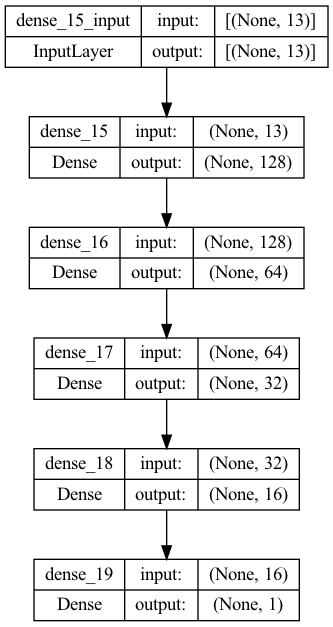

In [144]:
# keras.utils.plot_model(model)  # 모델의 구조를 graphviz를 이용해서 시각화
# keras.utils.plot_model(model, show_shapes=True) # 각 layer의 input shape와 output shape를 같이 시각화
keras.utils.plot_model(model, show_shapes=True, to_file='housing_model.png') # to_file: 저장파일경로 지정

##### 학습(Train)

In [145]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=test_dataset)

Epoch 1/200
11/12 [==========================>...] - ETA: 0s - loss: 593.2320

2022-07-14 09:19:36.373362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 09:19:36.536232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 14ms/step - loss: 577.3931 - val_loss: 588.7252
Epoch 2/200
12/12 [==============================] - 0s 19ms/step - loss: 535.2087 - val_loss: 528.5539
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 449.3877 - val_loss: 395.9604
Epoch 4/200
12/12 [==============================] - 0s 15ms/step - loss: 285.8781 - val_loss: 178.5878
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 109.0846 - val_loss: 73.3984
Epoch 6/200
12/12 [==============================] - 0s 8ms/step - loss: 65.2829 - val_loss: 45.6338
Epoch 7/200
12/12 [==============================] - 0s 16ms/step - loss: 39.5781 - val_loss: 34.2213
Epoch 8/200
12/12 [==============================] - 0s 7ms/step - loss: 28.1577 - val_loss: 27.1693
Epoch 9/200
12/12 [==============================] - 0s 7ms/step - loss: 23.3589 - val_loss: 25.1920
Epoch 10/200
12/12 [==============================] - 0s 8ms/step - loss: 19.0858 - val_lo

Epoch 82/200
12/12 [==============================] - 0s 7ms/step - loss: 5.7363 - val_loss: 17.0651
Epoch 83/200
12/12 [==============================] - 0s 6ms/step - loss: 5.6796 - val_loss: 16.5922
Epoch 84/200
12/12 [==============================] - 0s 6ms/step - loss: 5.5982 - val_loss: 16.6623
Epoch 85/200
12/12 [==============================] - 0s 6ms/step - loss: 5.4276 - val_loss: 16.0767
Epoch 86/200
12/12 [==============================] - 0s 6ms/step - loss: 5.3657 - val_loss: 16.9969
Epoch 87/200
12/12 [==============================] - 0s 6ms/step - loss: 5.2746 - val_loss: 15.6867
Epoch 88/200
12/12 [==============================] - 0s 7ms/step - loss: 5.2861 - val_loss: 17.2043
Epoch 89/200
12/12 [==============================] - 0s 6ms/step - loss: 5.2864 - val_loss: 15.9690
Epoch 90/200
12/12 [==============================] - 0s 6ms/step - loss: 5.1564 - val_loss: 15.1664
Epoch 91/200
12/12 [==============================] - 0s 6ms/step - loss: 5.1356 - val_loss

12/12 [==============================] - 0s 7ms/step - loss: 2.9075 - val_loss: 12.4284
Epoch 163/200
12/12 [==============================] - 0s 7ms/step - loss: 2.8501 - val_loss: 12.0242
Epoch 164/200
12/12 [==============================] - 0s 7ms/step - loss: 2.6896 - val_loss: 11.3893
Epoch 165/200
12/12 [==============================] - 0s 7ms/step - loss: 2.5641 - val_loss: 11.2503
Epoch 166/200
12/12 [==============================] - 0s 7ms/step - loss: 2.6795 - val_loss: 11.4407
Epoch 167/200
12/12 [==============================] - 0s 5ms/step - loss: 2.5644 - val_loss: 11.7607
Epoch 168/200
12/12 [==============================] - 0s 6ms/step - loss: 2.4777 - val_loss: 11.6220
Epoch 169/200
12/12 [==============================] - 0s 6ms/step - loss: 2.4739 - val_loss: 12.1093
Epoch 170/200
12/12 [==============================] - 0s 7ms/step - loss: 2.5129 - val_loss: 11.5962
Epoch 171/200
12/12 [==============================] - 0s 7ms/step - loss: 2.4458 - val_loss: 11

In [146]:
hist.history

{'loss': [577.3931274414062,
  535.208740234375,
  449.3876953125,
  285.8780517578125,
  109.08464813232422,
  65.28291320800781,
  39.57807922363281,
  28.15766716003418,
  23.358901977539062,
  19.08582305908203,
  19.503826141357422,
  17.986114501953125,
  14.95280647277832,
  15.274832725524902,
  14.590631484985352,
  12.482928276062012,
  12.852462768554688,
  12.80726146697998,
  12.077491760253906,
  11.968055725097656,
  11.49866771697998,
  11.226449966430664,
  10.718620300292969,
  10.135026931762695,
  10.429023742675781,
  10.114408493041992,
  9.310066223144531,
  9.960269927978516,
  9.56862735748291,
  9.456390380859375,
  9.467851638793945,
  9.297124862670898,
  9.319253921508789,
  8.499340057373047,
  9.076608657836914,
  8.836747169494629,
  8.746879577636719,
  8.435548782348633,
  8.318286895751953,
  8.382619857788086,
  8.272159576416016,
  8.554559707641602,
  8.195752143859863,
  8.135876655578613,
  8.244293212890625,
  8.150400161743164,
  7.299489974975

##### 결과 시각화

In [147]:
import matplotlib.pyplot as plt

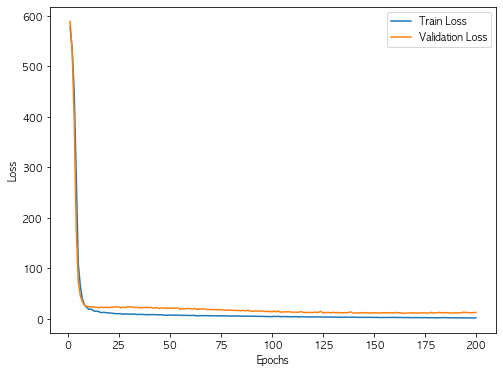

In [148]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

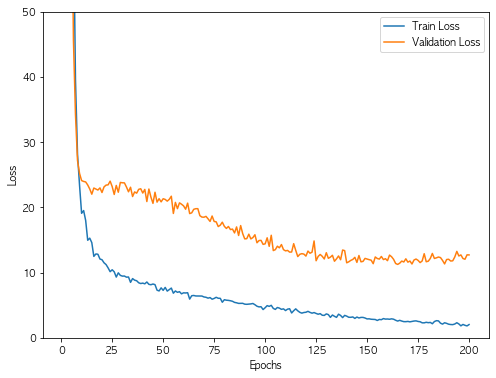

In [149]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.ylim(0,50)

plt.legend()
plt.show()

##### 최종 테스트

In [150]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

4/4 [==============================] - 0s 4ms/step - loss: 12.7081
12.70808219909668 3.5648397157651672


##### 모델 네트워크 저장

In [50]:
model.save('models/boston_hosing_model')

INFO:tensorflow:Assets written to: models/boston_hosing_model/assets


In [154]:
# 저장된 모델을 읽어오기
housing_model = keras.models.load_model('models/boston_hosing_model')

In [156]:
housing_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


##### 새로운 데이터 추론

In [159]:
new_data = X_test[:5]
pred = housing_model.predict(new_data)

1/1 [==============================] - 0s 47ms/step


2022-07-14 09:32:34.741734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [162]:
 pred

array([[ 8.610636],
       [18.28728 ],
       [20.553057],
       [32.228184],
       [24.488523]], dtype=float32)

In [163]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [164]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [165]:
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [168]:
p=0
class_names[p]

'T-shirt/top'

##### Data 로딩

In [170]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

##### validata set  생성

In [171]:
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

##### 이미지 확인

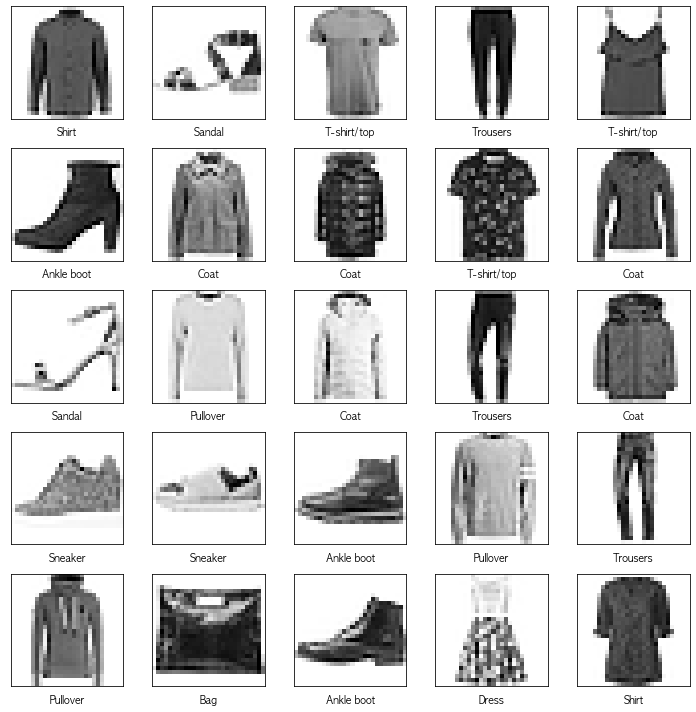

In [172]:
# train image에서 25새
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i], cmap="Greys")
    plt.xlabel(class_names[train_label[i]])

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [173]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### X, y  전처리
- y값 처리
    - 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리
        - 모델이 각 클래스별 확률을 출력하도록 구현 -> loss계산을 위해 y(ground truth-정답)을 one hot encoding 처리

In [174]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.
    

In [175]:
X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

# 255로 나누는 작업은 dataset생성시 map을 이용해서 처리
#    - 실제 할때는 직접 255로 나누도록 한다. map을 사용하는 것은 비효율적이다

##### Dataset 생성

In [176]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)

In [177]:
X_train.shape

(48000, 28, 28)

##### 모델 생성 및 컴파일

In [178]:
def create_fashionmnist_model():
    model = keras.Sequential()
    # Hidden Layer
    # 1. Flatten + input_shape을 지정해서 InputLayer를 추가
    model.add(layers.Flatten(input_shape=(28,28)))   # 입력데이터의 shape이 다차원 배열형태일때 1차원 배열로 변환
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [179]:
model = create_fashionmnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


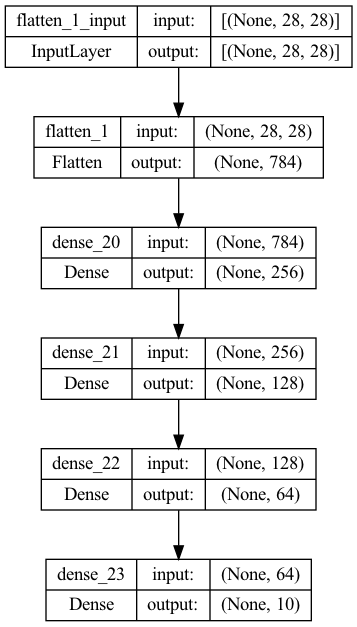

In [181]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

##### Train(학습)

In [182]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

Epoch 1/20


2022-07-14 10:42:15.355384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - ETA: 0s - loss: 0.5456 - accuracy: 0.8099

2022-07-14 10:42:19.269974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 5s 8ms/step - loss: 0.5456 - accuracy: 0.8099 - val_loss: 0.4203 - val_accuracy: 0.8473
Epoch 2/20
480/480 [==============================] - 4s 9ms/step - loss: 0.3826 - accuracy: 0.8620 - val_loss: 0.4090 - val_accuracy: 0.8503
Epoch 3/20
480/480 [==============================] - 4s 8ms/step - loss: 0.3398 - accuracy: 0.8756 - val_loss: 0.3478 - val_accuracy: 0.8706
Epoch 4/20
480/480 [==============================] - 4s 8ms/step - loss: 0.3152 - accuracy: 0.8832 - val_loss: 0.3256 - val_accuracy: 0.8809
Epoch 5/20
480/480 [==============================] - 4s 8ms/step - loss: 0.2952 - accuracy: 0.8898 - val_loss: 0.3222 - val_accuracy: 0.8834
Epoch 6/20
480/480 [==============================] - 4s 8ms/step - loss: 0.2768 - accuracy: 0.8970 - val_loss: 0.3190 - val_accuracy: 0.8842
Epoch 7/20
480/480 [==============================] - 4s 8ms/step - loss: 0.2614 - accuracy: 0.9030 - val_loss: 0.3095 - val_accuracy: 0.8874
Epoch 8/20
480/48

##### 결과 시각화

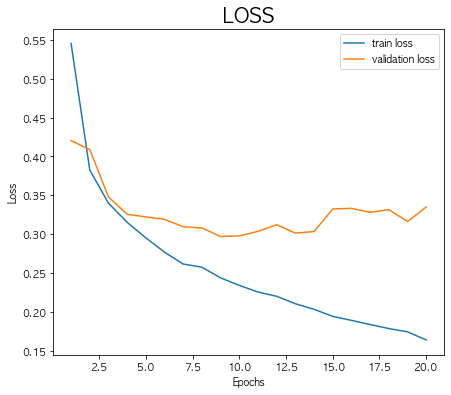

In [183]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

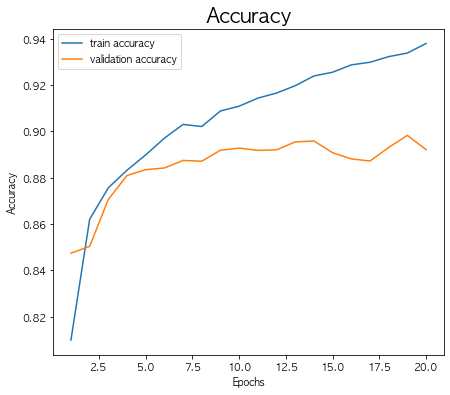

In [184]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 최종평가

In [185]:
loss, accuracy = model.evaluate(test_dataset)

100/100 [==============================] - 1s 6ms/step - loss: 0.3824 - accuracy: 0.8838


In [186]:
print(loss, accuracy)

0.3823786675930023 0.8838000297546387


####  모델저장

In [187]:
model.save('models/fashion_mnist_model')

INFO:tensorflow:Assets written to: models/fashion_mnist_model/assets


#### 새로운 데이터 추론

In [188]:
new_input = X_test[:5]
new_input = new_input/255.0

In [189]:
pred = model.predict(new_input)
pred[0]

1/1 [==============================] - 0s 46ms/step


2022-07-14 10:51:17.750571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([7.1982163e-06, 2.8916890e-08, 3.5536616e-09, 1.0799455e-06,
       2.0954714e-09, 6.0636590e-05, 2.8975135e-08, 5.3342232e-03,
       5.1219189e-08, 9.9459690e-01], dtype=float32)

In [190]:
pred_class = np.argmax(pred, axis=-1)
pred_class

array([9, 2, 1, 1, 6])

In [191]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [192]:
pred_class_name = class_names[pred_class]
pred_class_name

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')

In [193]:
pred_proba = np.max(pred, axis=-1)
pred_proba

array([0.9945969 , 0.99745935, 1.        , 1.        , 0.9266964 ],
      dtype=float32)

In [195]:
for idx, (name, proba) in enumerate(zip(pred_class_name, pred_proba)):
    print(f"{idx}. {name}: {proba:.4f}")

0. Ankle boot: 0.9946
1. Pullover: 0.9975
2. Trousers: 1.0000
3. Trousers: 1.0000
4. Shirt: 0.9267


## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현 (양성 여부 - o:양성, x:음성)
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
    

- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [196]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [197]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [199]:
X_train[:3]

array([[1.955e+01, 2.321e+01, 1.289e+02, 1.174e+03, 1.010e-01, 1.318e-01,
        1.856e-01, 1.021e-01, 1.989e-01, 5.884e-02, 6.107e-01, 2.836e+00,
        5.383e+00, 7.010e+01, 1.124e-02, 4.097e-02, 7.469e-02, 3.441e-02,
        2.768e-02, 6.240e-03, 2.082e+01, 3.044e+01, 1.420e+02, 1.313e+03,
        1.251e-01, 2.414e-01, 3.829e-01, 1.825e-01, 2.576e-01, 7.602e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, 5.859e+02, 8.817e-02, 6.718e-02,
        1.055e-02, 9.937e-03, 1.405e-01, 5.848e-02, 3.563e-01, 4.833e-01,
        2.235e+00, 2.934e+01, 6.432e-03, 1.156e-02, 7.741e-03, 5.657e-03,
        1.227e-02, 2.564e-03, 1.527e+01, 1.750e+01, 9.790e+01, 7.066e+02,
        1.072e-01, 1.071e-01, 3.517e-02, 3.312e-02, 1.859e-01, 6.810e-02],
       [1.865e+01, 1.760e+01, 1.237e+02, 1.076e+03, 1.099e-01, 1.686e-01,
        1.974e-01, 1.009e-01, 1.907e-01, 6.049e-02, 6.289e-01, 6.633e-01,
        4.293e+00, 7.156e+01, 6.294e-03, 3.994e-02, 5.554e-02, 1.695e-02,
        2.428e-02, 3.535e-03, 2.282e

In [200]:
y_train[:3]

array([0, 1, 0])

#### 하이퍼파라미터, 변수 정의

In [201]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
- 이진 분류
    - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용하는 경우(1일 확률) => y:그대로 사용
    - 출력 레이어의 unit을 2개, activation 함수를 sofmax를 사용하는 경우(0일 확률, 1일 확률) - 다중분류와 동일하게 구현 => y: one hot encoding
- X: 테이블데이터
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [202]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성

In [203]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

#### model 생성, 컴파일

In [204]:
def create_wisconsin_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [205]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [206]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                992       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


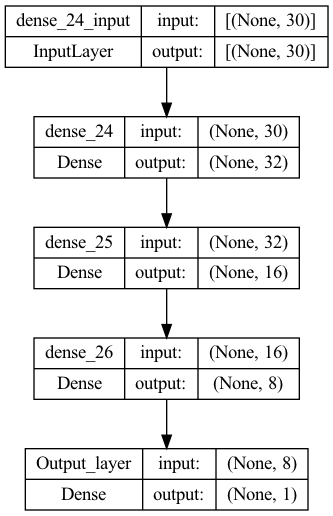

In [207]:
keras.utils.plot_model(model, show_shapes=True, to_file='cancer_model.png')

#### Train(학습)

In [208]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/150
1/7 [===>..........................] - ETA: 1s - loss: 0.6589 - accuracy: 0.6200

2022-07-14 11:46:06.761971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 11:46:06.911130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 21ms/step - loss: 0.6079 - accuracy: 0.6857 - val_loss: 0.5870 - val_accuracy: 0.8022
Epoch 2/150
7/7 [==============================] - 0s 7ms/step - loss: 0.5478 - accuracy: 0.8257 - val_loss: 0.5405 - val_accuracy: 0.8681
Epoch 3/150
7/7 [==============================] - 0s 8ms/step - loss: 0.4975 - accuracy: 0.9086 - val_loss: 0.4997 - val_accuracy: 0.8791
Epoch 4/150
7/7 [==============================] - 0s 8ms/step - loss: 0.4564 - accuracy: 0.9257 - val_loss: 0.4627 - val_accuracy: 0.8791
Epoch 5/150
7/7 [==============================] - 0s 7ms/step - loss: 0.4156 - accuracy: 0.9429 - val_loss: 0.4251 - val_accuracy: 0.9011
Epoch 6/150
7/7 [==============================] - 0s 8ms/step - loss: 0.3743 - accuracy: 0.9514 - val_loss: 0.3860 - val_accuracy: 0.9011
Epoch 7/150
7/7 [==============================] - 0s 7ms/step - loss: 0.3366 - accuracy: 0.9629 - val_loss: 0.3459 - val_accuracy: 0.9341
Epoch 8/150
7/7 [=====================

7/7 [==============================] - 0s 8ms/step - loss: 0.0193 - accuracy: 0.9971 - val_loss: 0.0305 - val_accuracy: 0.9780
Epoch 60/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0189 - accuracy: 0.9971 - val_loss: 0.0307 - val_accuracy: 0.9780
Epoch 61/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9971 - val_loss: 0.0308 - val_accuracy: 0.9780
Epoch 62/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0176 - accuracy: 0.9971 - val_loss: 0.0315 - val_accuracy: 0.9780
Epoch 63/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 0.9780
Epoch 64/150
7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 0.9780
Epoch 65/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 0.0316 - val_accuracy: 0.9780
Epoch 66/150
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 0.9780
Epoch 118/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9780
Epoch 119/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9780
Epoch 120/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9780
Epoch 121/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9780
Epoch 122/150
7/7 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9780
Epoch 123/150
7/7 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9780
Epoch 124/150
7/7 [========

#### 결과 시각화

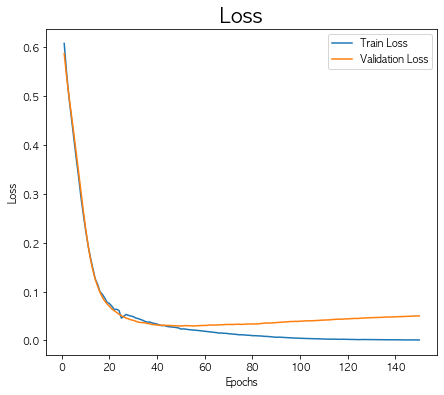

In [209]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

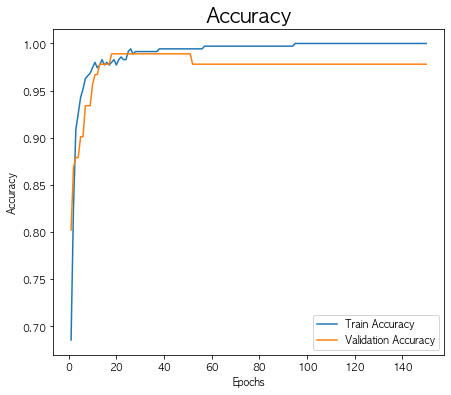

In [210]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [211]:
loss, acc = model.evaluate(test_dataset)

3/3 [==============================] - 0s 21ms/step - loss: 0.1643 - accuracy: 0.9561


In [212]:
print(loss, acc)

0.16426442563533783 0.9561403393745422


#### 모델저장

In [213]:
model.save('models/breast_cancer_model')

INFO:tensorflow:Assets written to: models/breast_cancer_model/assets


#### 새로운 데이터 추론

In [214]:
new_data = X_test[:5]
new_data_scaled = scaler.transform(new_data)

In [215]:
pred = model.predict(new_data_scaled)

1/1 [==============================] - 0s 47ms/step


2022-07-14 12:12:00.320688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [216]:
pred

array([[3.7293457e-08],
       [6.8186593e-36],
       [2.1352302e-09],
       [9.9999595e-01],
       [1.4719187e-10]], dtype=float32)

In [217]:
threshold = 0.5
result = (pred > threshold).astype(np.int8)
result

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int8)

In [218]:
result_label = np.where(pred > threshold, "양성-1", "악성-0")
result_label

array([['악성-0'],
       ['악성-0'],
       ['악성-0'],
       ['양성-1'],
       ['악성-0']], dtype='<U4')

- 모델의 분류예측 결과를 후처리ㅏ -> 모델이 출력한 확률을 class로 변환
    - 다중분류(모델이 클래스별 확률 출력): np.argmax(예측결과, axis=-1)
    - 이진분류(모델이 양성의 확률을 출력): np.where(pred>threshold, "양성 label", "음성 label")

# Tensorflow 2.3이하 버전에서 Train dataset 구성 및 학습 
- 위의 코드들은 2.4 이후 버전
- 2.3 이하버전에서는 
    1. train_dataset 구성시 repeat()를 추가
    2. 학습시에 train/validation 1 epoch당 step 횟수를 추가
        - steps_per_epoch: train set 에 대한 step 횟수
        - validation_steps: validation set 에 대한 step 횟수

In [ ]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

val_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [ ]:
steps_per_epoch = N_TRAIN // N_BATCHS #repeat() 때문에 len()을 사용못함
validation_steps = len(val_dataset2) #len(Dataset): step수 반환
print(steps_per_epoch, validation_steps)

In [ ]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset2, 
          steps_per_epoch=steps_per_epoch,
          validation_data=val_dataset2,
          validation_steps=validation_steps, 
          epochs=10)